# Cassification: k-Nearest Neighbors

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('telemarketing_train_preprocess.csv')

In [29]:
df.shape()

TypeError: 'tuple' object is not callable

## Exploratory Data Analysis

In [3]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            15000 non-null  float64
 1   duration                       15000 non-null  float64
 2   campaign                       15000 non-null  float64
 3   pdays                          15000 non-null  float64
 4   previous                       15000 non-null  float64
 5   emp.var.rate                   15000 non-null  float64
 6   cons.price.idx                 15000 non-null  float64
 7   cons.conf.idx                  15000 non-null  float64
 8   euribor3m                      15000 non-null  float64
 9   nr.employed                    15000 non-null  float64
 10  marital_divorced               15000 non-null  int64  
 11  marital_married                15000 non-null  int64  
 12  marital_single                 15000 non-null 

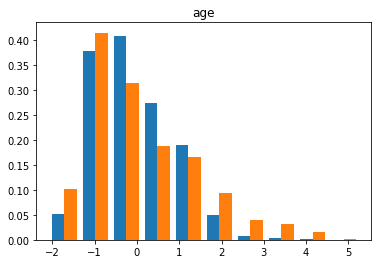

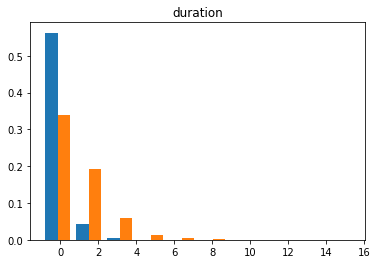

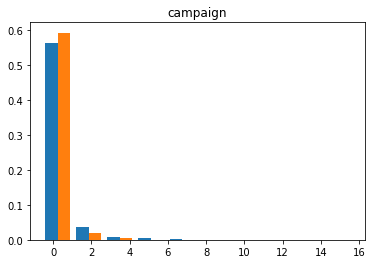

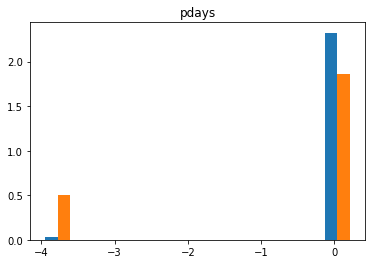

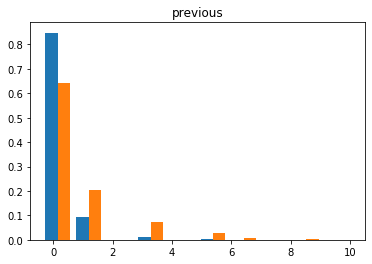

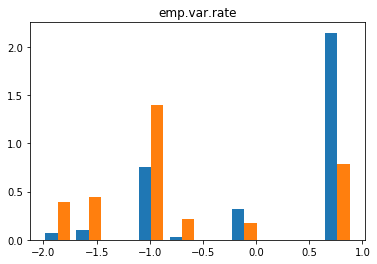

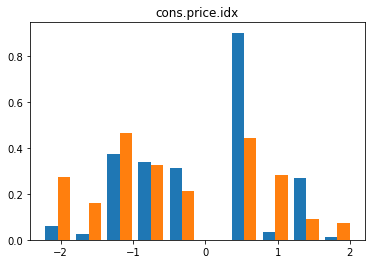

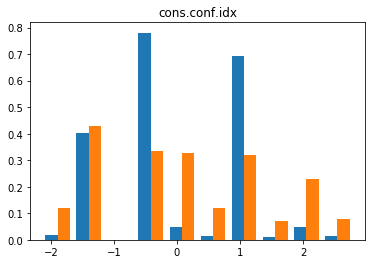

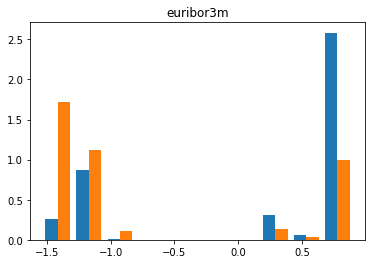

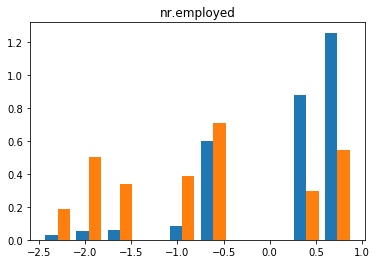

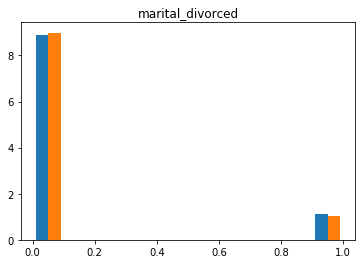

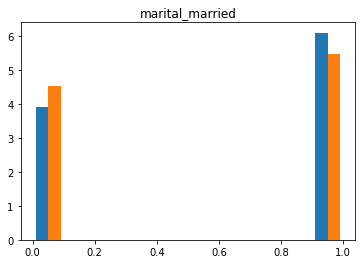

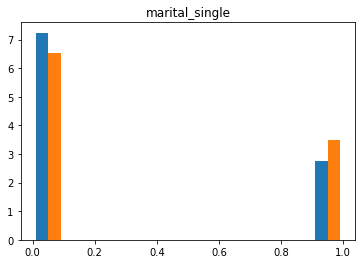

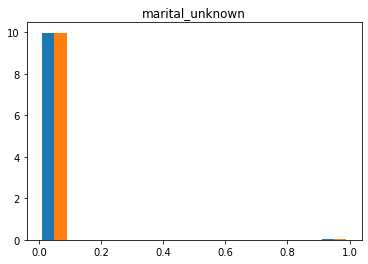

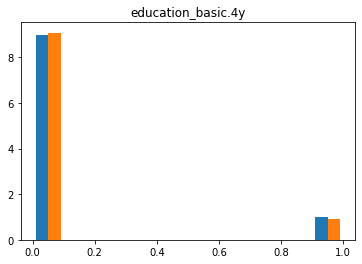

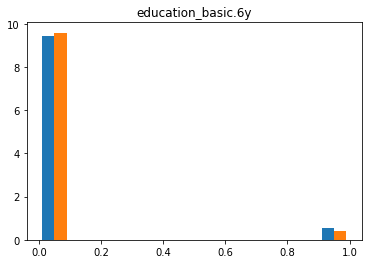

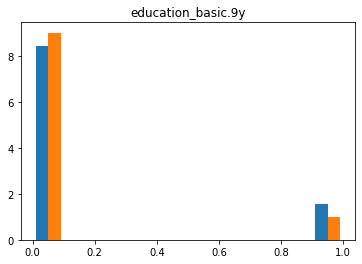

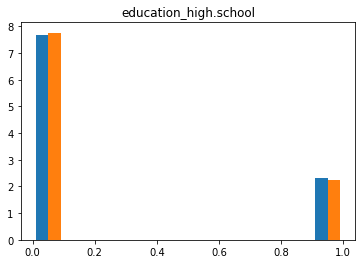

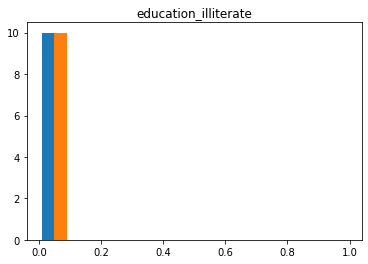

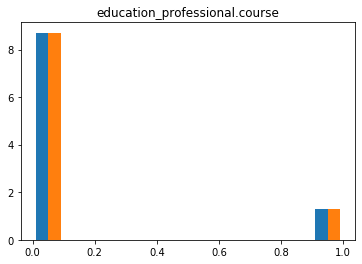

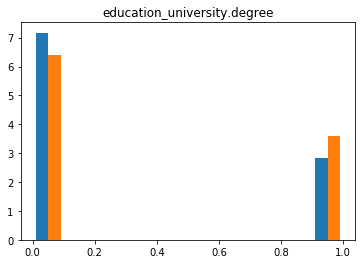

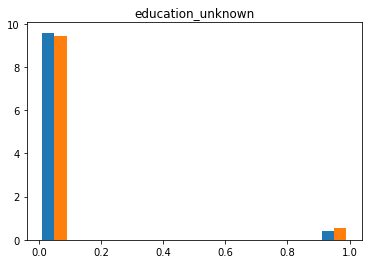

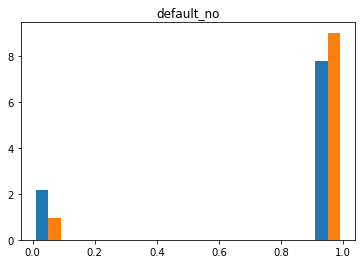

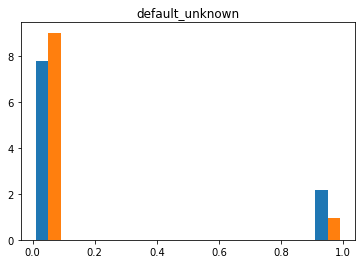

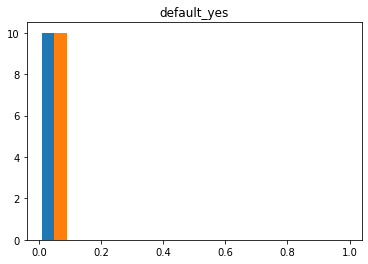

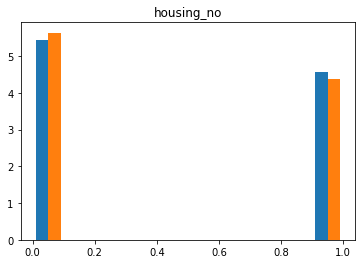

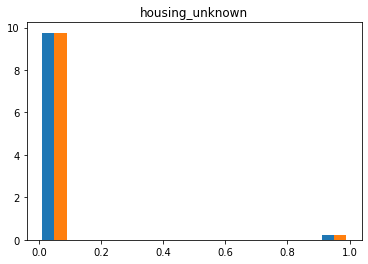

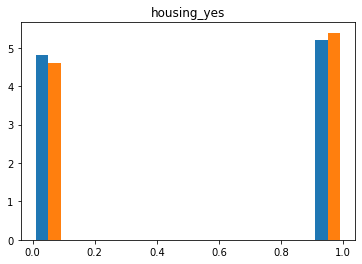

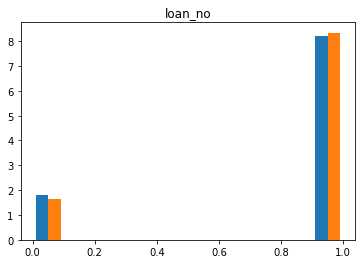

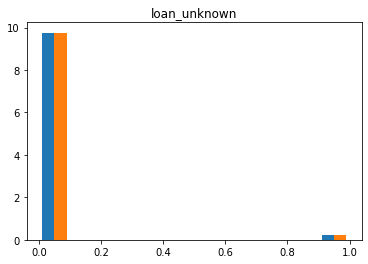

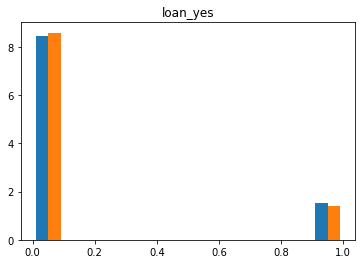

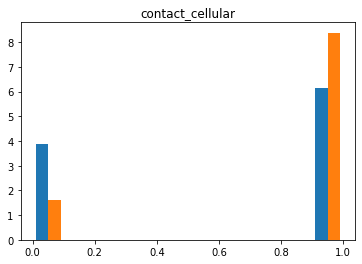

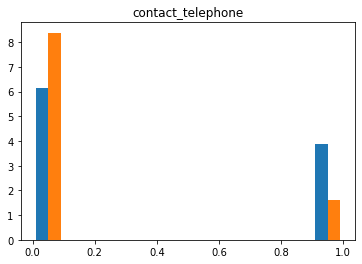

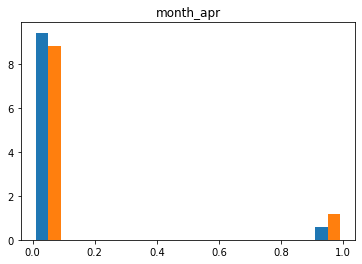

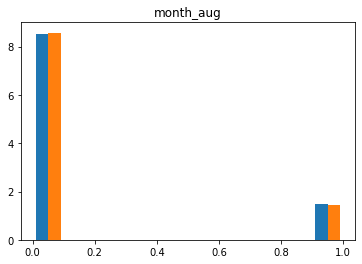

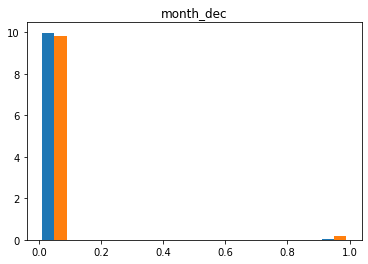

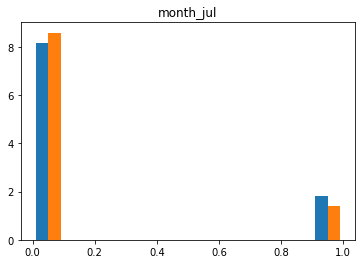

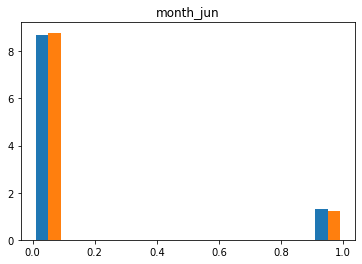

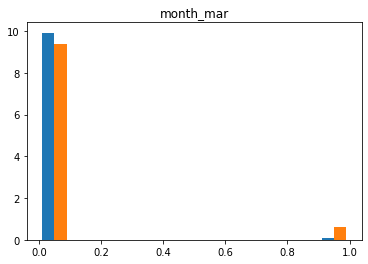

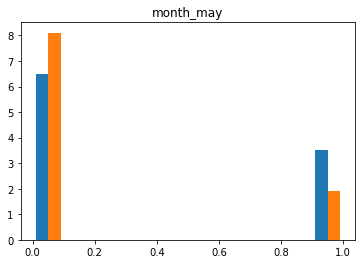

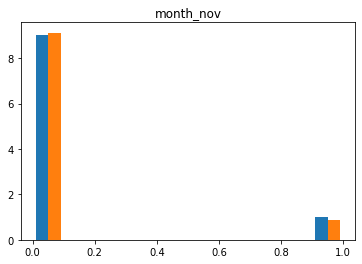

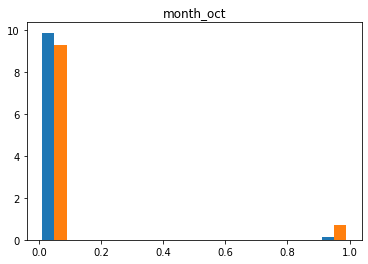

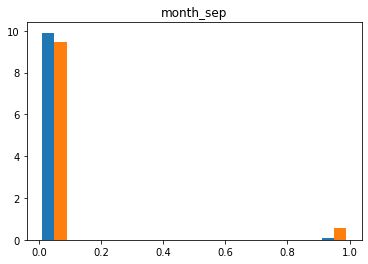

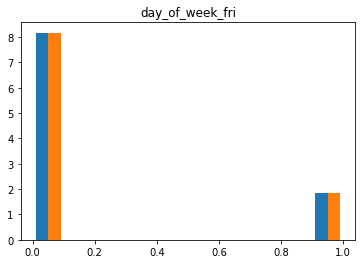

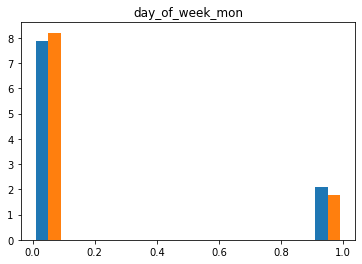

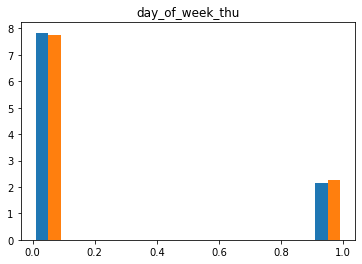

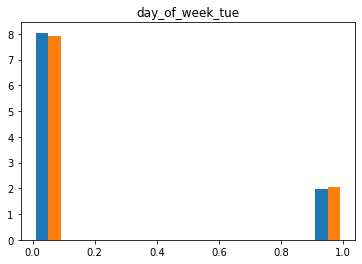

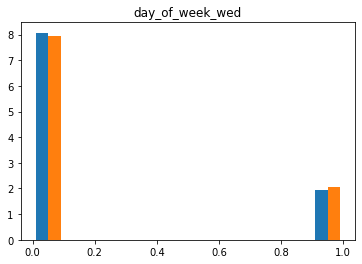

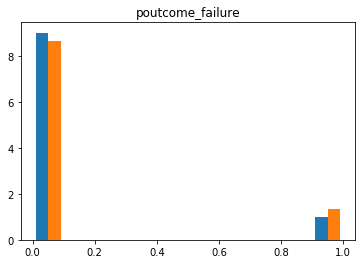

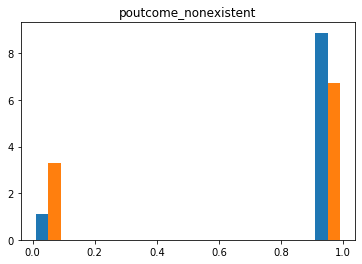

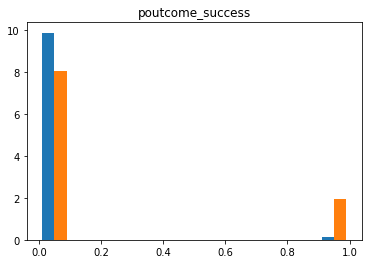

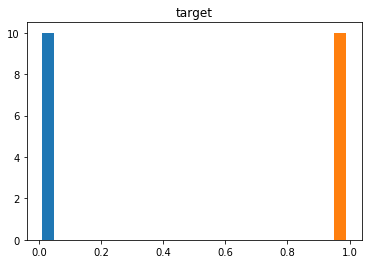

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

X=df

X0 = X[X['target']==0]
X1 = X[X['target']==1]


fig = plt.figure()
for i in X.columns :
    plt.hist([X0[i],X1[i]],density=True)
    plt.title(i)
    plt.show()


target
0    11552
1     3448
dtype: int64


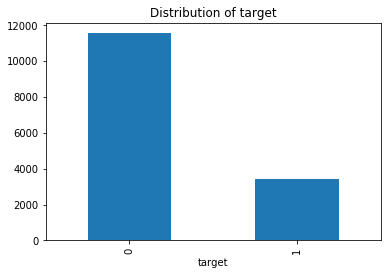

In [8]:
#Print class freq. through pandas: we group the data by the column target and we count the number of rows 
target_dist=df.groupby('target').size()
print(target_dist)

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Visualize Class Counts
target_dist.plot.bar(x='',y='',title='Distribution of target')

## Data Preparation 

### Separate Train/Test sets

In [9]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.444850,-0.746982,-0.571300,-3.969061,1.366417,-1.706389,-2.254135,1.860592,-1.400757,-1.031304,...,0,0,0,0,0,1,0,0,1,1
1,1.082169,0.100012,-0.571300,0.252494,-0.378985,-1.706389,-0.979221,-0.075950,-1.187102,-1.031304,...,0,0,1,0,0,0,0,1,0,1
2,0.447476,-0.363501,0.974844,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,0,0,0,0,1,0,1,0,0
3,-0.731238,-0.200104,-0.184764,0.252494,-0.378985,0.728330,0.745760,0.830517,0.795410,0.429467,...,0,0,0,0,1,0,0,1,0,0
4,-0.731238,2.884420,-0.184764,0.252494,-0.378985,-0.002086,-0.582693,-0.323168,0.333873,0.490545,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.991498,-0.146750,-0.571300,0.252494,-0.378985,0.728330,0.745760,0.830517,0.794858,0.429467,...,0,0,0,0,1,0,0,1,0,0
14996,1.172839,-0.440197,6.772887,0.252494,-0.378985,0.910934,0.618604,-0.467378,0.852827,0.901546,...,0,0,0,0,1,0,0,1,0,0
14997,0.084795,-0.446866,0.974844,0.252494,1.366417,-1.036841,-1.096339,-1.188431,-1.195936,-0.739913,...,0,1,0,0,0,0,1,0,0,0
14998,-0.549897,-0.716970,0.201772,0.252494,-0.378985,0.910934,-0.174453,0.892321,0.854483,0.901546,...,0,1,0,0,0,0,0,1,0,0


In [10]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
y.head()

0    1
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 234) #fix random seed for replicability

print(X_train.shape,X_test.shape)

(10500, 51) (4500, 51)


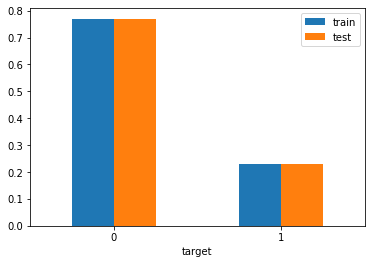

In [17]:
y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels

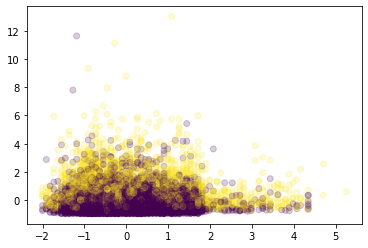

In [18]:
import matplotlib.pyplot as plt

x = X_train.iloc[:,0]
y = X_train.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

# A first model: K-Nearest Neighbor

The K-Nearest Neighbor classification model simply assign to new observation the most common value among its k-nearest neighbors

![KNN](KnnClassification.svg)

In [20]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#Create KNN Classifier
knn3 = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn3.predict(X_test)


In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3162  304]
 [ 374  660]]


In [23]:
#EVALUATE OUR PREDICTION
from sklearn import metrics

print('***RESULTS ON TEST SET***')
print("F1_score: ",metrics.f1_score(y_test, y_pred))
print("Accuracy",metrics.accuracy_score(y_test, y_pred))
print("Recall",metrics.recall_score(y_test, y_pred))


***RESULTS ON TEST SET***
F1_score:  0.6606606606606608
Accuracy 0.8493333333333334
Recall 0.6382978723404256


## Searching the best parameters

#### DEFINE YOUR GRIDSEARCH 

GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)

Some Parameters:

- estimator : estimator object.
- param_grid : dict or list of dictionaries
- scoring : scoring parameter
- n_jobs : Number of jobs to run in parallel. -1 means using all processors
- cv : cross-validation generator (default 3-fold cross validation)
- verbose : Controls the verbosity: the higher, the more messages.



In [26]:
#Create KNN Classifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,30)}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)

In [28]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 29 candidates, totalling 87 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   1

In [30]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.663825 using {'n_neighbors': 7}
Mean 0.618684 Std (0.014296) with: {'n_neighbors': 1}
Mean 0.527180 Std (0.011477) with: {'n_neighbors': 2}
Mean 0.651922 Std (0.007347) with: {'n_neighbors': 3}
Mean 0.591459 Std (0.009284) with: {'n_neighbors': 4}
Mean 0.662603 Std (0.006339) with: {'n_neighbors': 5}
Mean 0.612198 Std (0.009999) with: {'n_neighbors': 6}
Mean 0.663825 Std (0.003478) with: {'n_neighbors': 7}
Mean 0.626982 Std (0.013424) with: {'n_neighbors': 8}
Mean 0.657936 Std (0.003060) with: {'n_neighbors': 9}
Mean 0.624808 Std (0.008618) with: {'n_neighbors': 10}
Mean 0.656185 Std (0.003175) with: {'n_neighbors': 11}
Mean 0.630053 Std (0.003265) with: {'n_neighbors': 12}
Mean 0.655950 Std (0.002606) with: {'n_neighbors': 13}
Mean 0.630814 Std (0.003851) with: {'n_neighbors': 14}
Mean 0.653213 Std (0.000650) with: {'n_neighbors': 15}
Mean 0.637307 Std (0.006914) with: {'n_neighbors': 16}
Mean 0.657668 Std (0.006131) with: {'n_neighbors': 17}
Mean 0.639737 Std (0.003235)

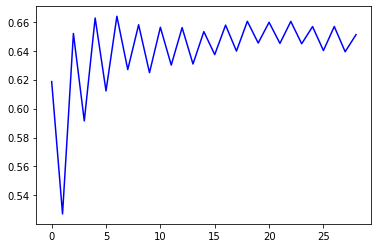

In [31]:
import matplotlib.pyplot as plt

plt.plot (means, color='blue', alpha=1.00)
plt.show()

In [32]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [34]:
#This is your prediction on the TEST SET
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics 
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m


***RESULTS ON TEST SET***
precision:  0.7114967462039046
recall:  0.6344294003868471
f1_score:  0.6707566462167689
accuracy:  0.8568888888888889


In [37]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3466
           1       0.71      0.63      0.67      1034

    accuracy                           0.86      4500
   macro avg       0.80      0.78      0.79      4500
weighted avg       0.85      0.86      0.85      4500



In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[3200  266]
 [ 378  656]]


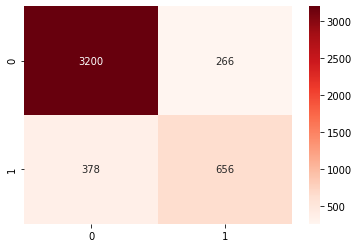

In [39]:
# Plot normalized confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds"); #annot=True to annotate cells fmt: format


### ROC Curve

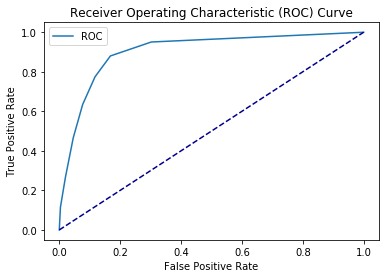

AUC: 0.90


In [40]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Apply PCA

In [43]:
#PCA fit
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
df_pca = pd.DataFrame(pca.transform(X))

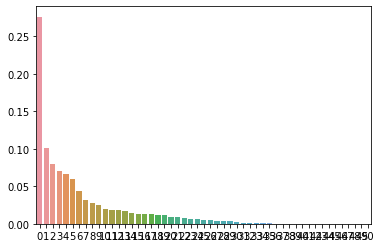

In [44]:
explained_variance=pd.DataFrame(pca.explained_variance_ratio_)
%matplotlib inline
import seaborn as sns
ax = sns.barplot( data=explained_variance.transpose())

In [45]:
pd.DataFrame(pca.components_,columns=X.columns)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,2.221839e-02,2.779887e-02,-1.109841e-01,-2.562435e-01,3.115088e-01,-4.684547e-01,-3.375585e-01,-3.703172e-02,-4.723369e-01,-4.548605e-01,...,0.016462,0.015286,0.001450,-0.001735,0.004366,-0.000176,-0.003905,0.063524,-1.186220e-01,0.055098
1,2.558851e-01,4.607300e-03,2.347116e-02,-5.683475e-01,4.676517e-01,1.865393e-01,3.562173e-01,3.735219e-01,1.522774e-01,-1.765072e-02,...,0.012954,0.018510,-0.002989,-0.010012,-0.008731,0.011325,0.010407,0.005548,-1.270200e-01,0.121472
2,6.385432e-01,-1.187436e-01,-1.289207e-01,2.100928e-01,-2.518643e-01,-9.243449e-02,-3.025887e-01,5.161806e-01,3.337834e-03,-5.360634e-03,...,0.015006,0.008049,0.001307,-0.002259,-0.016404,0.018718,-0.001362,-0.029428,7.291279e-02,-0.043485
3,1.326928e-02,7.949192e-01,-5.973819e-01,9.739137e-03,-4.762054e-02,4.252542e-02,4.584849e-02,1.715814e-02,4.386853e-02,2.342937e-02,...,0.000933,0.001497,-0.009910,-0.017554,0.008505,0.007699,0.011259,-0.016411,1.828467e-02,-0.001874
4,5.932122e-01,2.712593e-01,3.642146e-01,4.396825e-02,4.680121e-02,-4.484022e-03,1.504391e-01,-5.611855e-01,-8.063755e-02,-2.494010e-02,...,-0.013977,-0.010234,-0.000669,0.019629,0.001687,-0.008563,-0.012084,0.026957,-1.657689e-02,-0.010380
5,-1.817615e-01,5.244267e-01,6.914676e-01,-1.177458e-02,-9.047166e-02,-5.624718e-02,-1.665025e-01,3.853072e-01,-1.294466e-02,-3.044275e-02,...,0.009694,0.009950,0.009572,-0.012801,0.001497,-0.000456,0.002188,-0.033426,2.995716e-02,0.003469
6,-3.207435e-02,2.094260e-03,1.380781e-02,1.777155e-01,-1.831071e-01,-1.543693e-01,4.062627e-01,1.119779e-01,-2.127655e-01,-3.879847e-01,...,0.020682,0.019432,0.035970,0.003779,-0.036796,-0.002031,-0.000922,-0.032116,6.959731e-02,-0.037481
7,-6.296138e-03,1.339680e-03,1.938281e-03,3.303190e-02,9.026785e-02,1.385479e-02,-1.163806e-01,-3.760689e-02,3.582252e-02,8.848695e-02,...,-0.003337,-0.007389,0.007752,-0.014416,-0.006341,0.014983,-0.001978,0.049524,-4.036251e-02,-0.009161
8,-5.198729e-02,5.132711e-02,2.274681e-02,5.705963e-01,6.074364e-01,4.030668e-02,-6.744415e-02,9.570340e-02,6.664391e-02,7.231260e-02,...,-0.005065,-0.009151,0.030452,-0.017639,-0.008012,-0.005393,0.000591,0.359353,-2.189424e-01,-0.140410
9,-2.443574e-01,1.222264e-02,1.665711e-02,-2.695628e-01,-5.501451e-02,-2.538636e-02,-2.887344e-01,-8.131933e-02,4.099047e-02,1.612407e-01,...,-0.024656,-0.025119,0.011191,-0.011186,-0.010261,0.000146,0.010110,-0.058514,-3.583744e-03,0.062098


In [46]:
X_pca = pd.DataFrame(data = pca.transform(X))

X_train_pca = pd.DataFrame(data = pca.transform(X_train))

X_test_pca = pd.DataFrame(data = pca.transform(X_test))


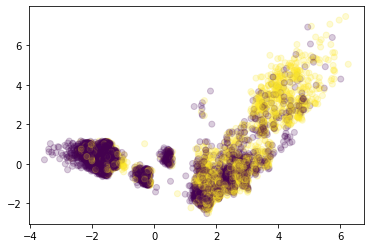

In [47]:
import matplotlib.pyplot as plt

x = X_train_pca.iloc[:,0]
y = X_train_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_train )
plt.show()

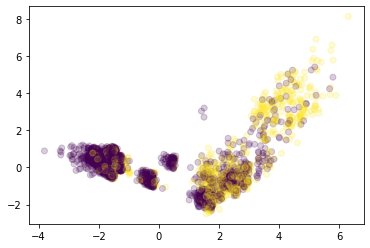

In [48]:
import matplotlib.pyplot as plt

x = X_test_pca.iloc[:,0]
y = X_test_pca.iloc[:,1]

plt.scatter(x, y,alpha=0.2,c=y_test )
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  10 out of  24 | elapsed:    3.0s remaining:    4.2s
[Parallel(n_jobs=-1)]: Done  11 out of  24 | elapsed:    3.2s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  13 out of  24 | elapsed:    3.3s r

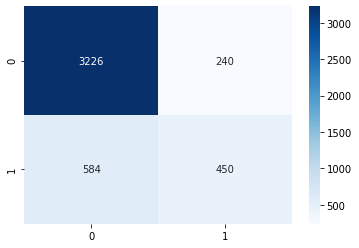

In [49]:
#DEFINE  PARAMETERS GRID
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,40,5)}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1)
# We use just the two first PC
gs = gs.fit(X_train_pca.iloc[:,:2], y_train) 

#Prediction
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test_pca.iloc[:,:2])

print("f1_score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


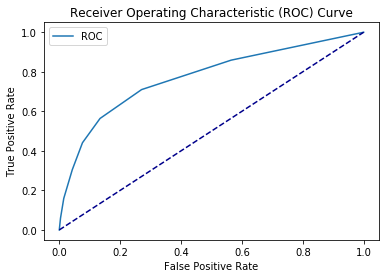

AUC: 0.77


In [51]:
#Using the two first PC
X_train_pca_2=X_train_pca.iloc[:,:2]
X_test_pca_2=X_test_pca.iloc[:,:2]

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_pca_2, y_train)
y_pred = model.predict(X_test_pca_2)

y_probs = model.predict_proba(X_test_pca_2) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

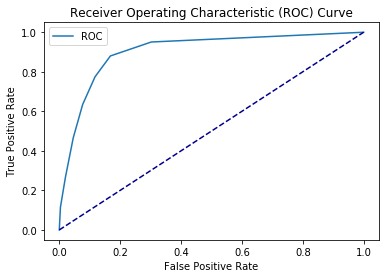

AUC: 0.90


In [53]:
# and with all PC

model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

y_probs = model.predict_proba(X_test_pca) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)